### Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

### Data

In [4]:
kaggle_data = pd.read_csv("https://raw.githubusercontent.com/lodi-m/u-integrity/main/data/normalized_scores/normalized_kaggle_essay_set.csv")
chatgpt_pred = pd.read_csv("https://raw.githubusercontent.com/lodi-m/u-integrity/main/data/lstm_predicted_chatgpt_scores.csv")

In [5]:
kaggle_scores = kaggle_data["normalized_score"]
chatgpt_scores = chatgpt_pred["lstm_score"]

### Statistics

#### Summary Stats

In [7]:
kaggle_scores.describe()

count    5875.000000
mean        0.617061
std         0.176122
min         0.000000
25%         0.500000
50%         0.600000
75%         0.750000
max         1.000000
Name: normalized_score, dtype: float64

In [8]:
chatgpt_scores.describe()

count    609.000000
mean       0.647833
std        0.075437
min        0.410000
25%        0.610000
50%        0.630000
75%        0.660000
max        0.990000
Name: lstm_score, dtype: float64

#### Top 10 most common scores %-wise

In [9]:
kaggle_scores.value_counts(normalize=True).nlargest(10)

0.600000    0.144340
0.500000    0.132426
0.750000    0.100766
0.700000    0.062128
0.625000    0.060426
0.800000    0.056000
0.636364    0.033872
0.681818    0.027234
0.400000    0.027064
1.000000    0.025702
Name: normalized_score, dtype: float64

In [10]:
chatgpt_scores.value_counts(normalize=True).nlargest(10)

0.64    0.114943
0.63    0.111658
0.62    0.103448
0.61    0.096880
0.65    0.072250
0.66    0.057471
0.60    0.044335
0.58    0.039409
0.67    0.037767
0.59    0.036125
Name: lstm_score, dtype: float64

#### Investigating percentage of essays per score bin

In [11]:
greater_than = 0.60
less_than = 0.75

In [12]:
kaggle_scores.between(greater_than, less_than, inclusive='both').sum() / len(kaggle_scores)

0.46485106382978725

In [13]:
chatgpt_scores.between(greater_than, less_than, inclusive='both').sum() / len(chatgpt_scores)

0.7487684729064039

## Visualizations

#### Actual Results: Human Written Essay VS No. Essay

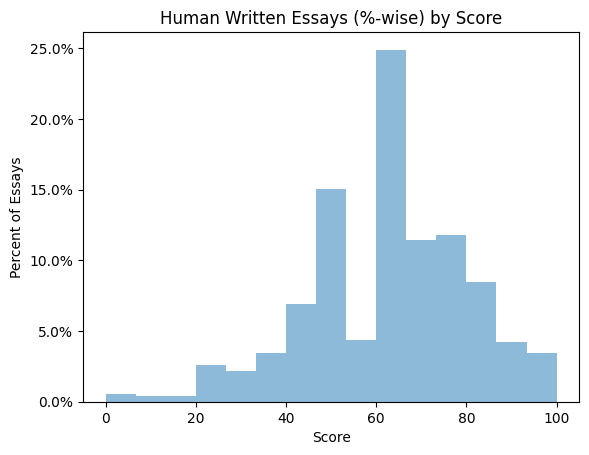

In [27]:
plt.hist(kaggle_scores*100, weights=np.ones(len(kaggle_scores)) / len(kaggle_scores), bins=15, alpha=0.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Human Written Essays (%-wise) by Score')
plt.xlabel('Score')
plt.ylabel('Percent of Essays')
plt.show()

#### Actual Results of Chat gpt essay rate (%) vs no. of essay

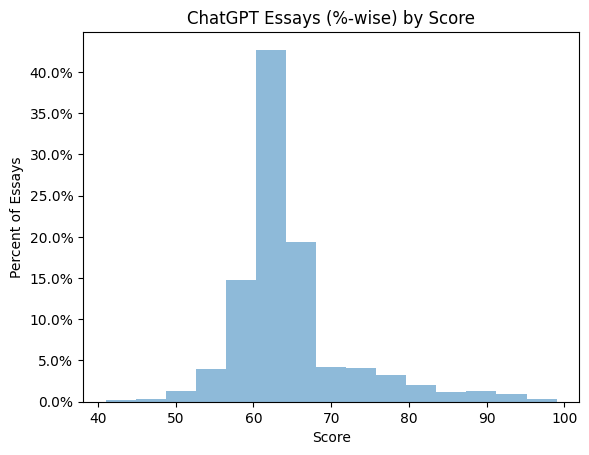

In [26]:
plt.hist(chatgpt_scores*100, weights=np.ones(len(chatgpt_scores)) / len(chatgpt_scores), bins=15, alpha=0.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('ChatGPT Essays (%-wise) by Score')
plt.xlabel('Score')
plt.ylabel('Percent of Essays')
plt.show()

#### Violin Plot

C:\Users\katyc\AppData\Local\Temp\ipykernel_36896\2078742145.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}'.format(y * 100) for y in yticks])


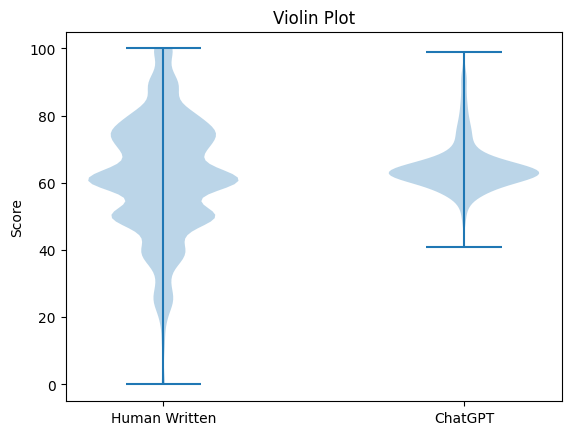

In [23]:
data = [kaggle_scores, chatgpt_scores]

# Set the title and axis labels
fig, ax = plt.subplots()
ax.violinplot(data)

# Set the title and axis labels
plt.title('Violin Plot')
plt.ylabel('Score')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Human Written', 'ChatGPT'])

yticks = ax.get_yticks()
ax.set_yticklabels(['{:.0f}'.format(y * 100) for y in yticks])

plt.show()

#### Overlay of Human and ChatGPT Essay Scores VS No. Essay

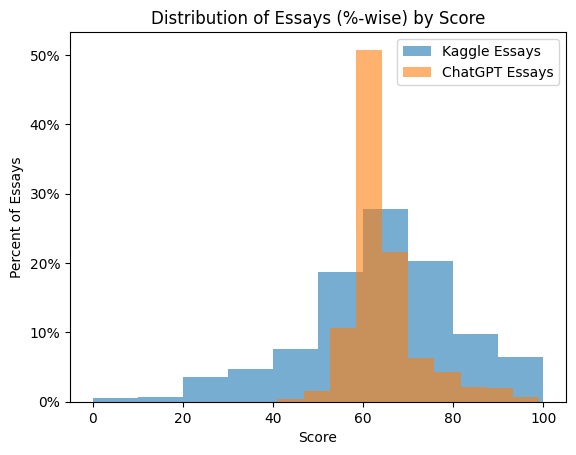

In [25]:
plt.hist(kaggle_scores*100, weights=np.ones(len(kaggle_scores)) / len(kaggle_scores), alpha=0.6, label='Kaggle Essays')
plt.hist(chatgpt_scores*100, weights=np.ones(len(chatgpt_scores)) / len(chatgpt_scores), alpha=0.6, label='ChatGPT Essays')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Distribution of Essays (%-wise) by Score')
plt.xlabel('Score')
plt.ylabel('Percent of Essays')
plt.legend()
plt.show()